In this task, the followings are the list of tasks in order to analyze menu sales from several brands in Indonesia.

1. Building some machine learning models to help predict menu based on users' behavioral information
2. Creating customer segmentation using a clustering-purposed machine learning model to help gaining insights of the customers' behaviour and giving lists of recommendations for some brands.

#Install Libraries

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.1 MB/s eta 0:00:00


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import category_encoders as ce
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, roc_auc_score, cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

import plotly.graph_objects as go
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F

import xgboost as xgb

#Exploratory Data Analysis


In [3]:
# Import Data
data = pd.read_csv('/content/data.csv')
data.iloc[0:20]

,trx_date,trx_date_detail,sales_id,concept,brand,outlet,district,city,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender
0,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
1,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
2,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
3,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
4,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
5,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
6,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
7,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,cfa23fc2-c4ab-4377-b0fe-489493016af1,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
8,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,9708a976-0852-4705-a619-359447db7b09,Ala Carte,LIQUEUR,CLASSIC COCKTAIL,Lemon Drop,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
9,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,cfa23fc2-c4ab-4377-b0fe-489493016af1,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F


In [4]:
# Calculate the combination count of date of order, user ID, brand, and the menu ID by summing the quantity of the same combination
data['combination_count'] = data.groupby(['trx_date', 'user_id', 'brand', 'menu_id'])['quantity'].transform('sum')

In [5]:
# Drop duplicates based on specified columns since there is already a combination count column
columns_to_check_duplicates = ['trx_date_detail', 'menu_id', 'user_id', 'brand']
data = data.drop_duplicates(subset=columns_to_check_duplicates)
data.reset_index(drop=True, inplace=True)
data.head(20)

,trx_date,trx_date_detail,sales_id,concept,brand,outlet,district,city,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender,combination_count
0,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,1.0
1,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,2.0
2,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,3.0
3,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,1.0
4,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,cfa23fc2-c4ab-4377-b0fe-489493016af1,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,2.0
5,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,9708a976-0852-4705-a619-359447db7b09,Ala Carte,LIQUEUR,CLASSIC COCKTAIL,Lemon Drop,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,1.0
6,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5aca9660-a702-4590-82dd-4c3666204fb8,Ala Carte,LIQUEUR,SIGNATURE COCKTAIL,Ginger,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,1.0
7,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,cb455155-3fd2-4000-8805-38ff4f4b56bc,Package Head,LIQUEUR,WHISK(E)Y,Monkey Shoulder (by glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,1.0
8,2023-03-04,2023-03-04 20:53:19 UTC,82120f70-c8a0-4f60-9444-5082c2b54a3c,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,9d1552e3-a96e-434c-b02a-4f2209314588,Ala Carte,LIQUEUR,SIGNATURE COCKTAIL,Fig,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,1.0
9,2023-03-04,2023-03-04 20:53:19 UTC,82120f70-c8a0-4f60-9444-5082c2b54a3c,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,699e445c-c077-4831-b46b-869bd8a610ec,Package Head,LIQUEUR,GIN,Voyage (by Glass),2.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F,2.0


In [6]:
# Checking whether there are any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24897 entries, 0 to 24896
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trx_date              24897 non-null  object 
 1   trx_date_detail       24897 non-null  object 
 2   sales_id              24897 non-null  object 
 3   concept               24897 non-null  object 
 4   brand                 24897 non-null  object 
 5   outlet                24897 non-null  object 
 6   district              24897 non-null  object 
 7   city                  24897 non-null  object 
 8   menu_id               24897 non-null  object 
 9   menu_type             24897 non-null  object 
 10  menu_category         24897 non-null  object 
 11  menu_category_detail  24897 non-null  object 
 12  menu_name             24897 non-null  object 
 13  quantity              24897 non-null  float64
 14  user_id               24897 non-null  object 
 15  user_created_at    

There are no null values.

In [7]:
# The average quantity that people usually order for every menu in a brand
data['combination_count'].agg(np.mean)

1.2775434791340323

In [8]:
# Checking the range of time of the orders in the data
data[['trx_date', 'trx_date_detail']].agg([np.min, np.max])

,trx_date,trx_date_detail
amin,2023-01-01,2023-01-01 08:48:48 UTC
amax,2023-03-31,2023-03-31 23:01:35 UTC


The data consists of orders start from January 1st, 2023 until March 31st, 2023.

In [9]:
# Delete columns that will not be used

# The trx_date will be deleted since it can also be represented by trx_date_detail
# Since the date and time of orders also represent new sales,
# the sales id will be deleted.
# The time when the user id was first created will also be deleted
# since it does not contribute to the prediction
# The menu id will also be deleted since it can be represented by the menu_name column

data = data.drop(columns = ['trx_date', 'sales_id', 'menu_id', 'user_created_at'])
data.head()

,trx_date_detail,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count
0,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,1.0
1,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,2.0
2,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,3.0
3,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,1.0
4,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,2.0


In [10]:
# Generating new columns such as month, weekday, and hour from the date and time of order column
temp = data.copy()
data['trx_date_detail'] = pd.to_datetime(data['trx_date_detail'])
temp['month'] = data['trx_date_detail'].dt.month
temp['weekday'] = data['trx_date_detail'].dt.weekday
temp['hour'] = data['trx_date_detail'].dt.hour
temp

,trx_date_detail,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
0,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,1.0,1,2,20
1,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,2.0,1,2,20
2,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,3.0,1,2,20
3,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,1.0,1,2,20
4,2023-01-04 20:26:46 UTC,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,Gold,F,2.0,1,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24892,2023-01-01 21:46:16 UTC,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",Ala Carte,FOOD,DESSERT,Brownies&Cream,1.0,0b826949-4772-4de9-8144-1d9beceb7481,Basic,F,1.0,1,6,21
24893,2023-01-01 21:46:16 UTC,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",Package Content,FOOD,FOOD MODIFIER,Setengah Matang,1.0,0b826949-4772-4de9-8144-1d9beceb7481,Basic,F,1.0,1,6,21
24894,2023-01-01 21:46:16 UTC,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",Package Content,BEVERAGE,BEVERAGE MODIFIER,Hot,1.0,0b826949-4772-4de9-8144-1d9beceb7481,Basic,F,1.0,1,6,21
24895,2023-01-01 21:46:16 UTC,Resto,TPC,"TPC, Summarecon Mall Serpong",Kelapa Dua,"Tangerang, Kab.",Package Head,BEVERAGE,FRESHLY BREWED BY DJOURNAL,Long Black,1.0,0b826949-4772-4de9-8144-1d9beceb7481,Basic,F,1.0,1,6,21


In [11]:
# Checking the new columns
temp['weekday'].unique()

array([2, 5, 6, 4, 0, 1, 3])

In [12]:
temp['hour'].unique()

array([20, 15, 17, 18, 16, 23, 21, 19, 13, 22,  0,  1,  2, 12, 14,  9,  4,
       10, 11,  7,  8])

In [13]:
# Rewrite the data, sort values based on user ID and the time of order, and
# drop the detail of the time of order column
data = temp
data.sort_values(by=['user_id', 'trx_date_detail'], inplace=True)
data = data.drop(columns='trx_date_detail')
data.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
11441,Resto,Djournal,"Djournal, Pakuwon Mall Surabaya",Wiyung,Surabaya,Package Head,BEVERAGE,KOPI BATAVIA BY DJOURNAL,Kopi Susu Batavia,1.0,00b158ed-0fcb-48e1-b627-2bb572a344cf,Silver,F,1.0,1,6,11
11442,Resto,Djournal,"Djournal, Pakuwon Mall Surabaya",Wiyung,Surabaya,Ala Carte,BEVERAGE,BEVERAGE ADDITIONAL,Extra 1 Espresso Shoot,1.0,00b158ed-0fcb-48e1-b627-2bb572a344cf,Silver,F,2.0,1,6,11
11443,Resto,Djournal,"Djournal, Pakuwon Mall Surabaya",Wiyung,Surabaya,Package Content,BEVERAGE,KOPI BATAVIA BY DJOURNAL,Reg Milk Kopi Ube,1.0,00b158ed-0fcb-48e1-b627-2bb572a344cf,Silver,F,1.0,1,6,11
11444,Resto,Djournal,"Djournal, Pakuwon Mall Surabaya",Wiyung,Surabaya,Package Head,BEVERAGE,KOPI BATAVIA BY DJOURNAL,Kopi Ube,1.0,00b158ed-0fcb-48e1-b627-2bb572a344cf,Silver,F,1.0,1,6,11
11445,Resto,Djournal,"Djournal, Pakuwon Mall Surabaya",Wiyung,Surabaya,Package Content,BEVERAGE,KOPI BATAVIA BY DJOURNAL,Reg Milk Iced KopSus Btv,1.0,00b158ed-0fcb-48e1-b627-2bb572a344cf,Silver,F,1.0,1,6,11


The next step is to see unique values in some columns to create a coded table for each variable.

In [14]:
data['user_gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
data['brand'].unique()

array(['Djournal', 'TPC', 'Pizza E Birra', 'Social House', 'Osteria GIA',
       'Kitchenette', 'Manarai', 'Social Garden', 'Tokyo Belly',
       'Publik Markette', 'Mr Fox', 'DF Kitchen', 'A/A', 'Djournal House',
       'Skye', 'Sushi Groove'], dtype=object)

In [16]:
data['outlet'].unique()

array(['Djournal, Pakuwon Mall Surabaya', 'TPC, Pakuwon Mall Surabaya',
       'TPC, Tunjungan Plaza', 'Pizza e Birra, Gandaria City',
       'Social House, Grand Indonesia',
       'Osteria GIA, Pondok Indah Mall 2', 'Kitchenette, Plaza Indonesia',
       'Manarai, Nusa Dua', 'TPC, Bintaro Exchange',
       'Djournal, Grand Indonesia', 'Djournal, Pondok Indah Mall 2',
       'TPC, Margo City Mall', 'Social Garden, Senayan City',
       'Djournal, Blok M Plaza', 'Djournal, Bintaro Exchange',
       'Osteria GIA, Plaza Indonesia', 'Osteria GIA, Pacific Place',
       'Tokyo Belly, Tunjungan Plaza',
       'Tokyo Belly, Citra Tower Kemayoran',
       'Pizza E Birra x Kitchenette, Central Park',
       'Kitchenette, Gandaria City', 'Kitchenette, Pacific Place',
       'Tokyo Belly, Pakuwon Mall Surabaya',
       'Kitchenette, Pakuwon Mall Surabaya', 'Djournal, Tunjungan Plaza',
       'TPC, Kota Kasablanka', 'Kitchenette, Kota Kasablanka',
       'Publik Markette, Grand Indonesia', 'TPC, 

In [17]:
data['outlet'].nunique()

100

In [18]:
data['menu_category'].unique()

array(['BEVERAGE', 'FOOD', 'LIQUEUR', 'BEER', 'WINE', 'CIGARETTE',
       'OTHER'], dtype=object)

In [19]:
data['menu_category_detail'].unique()

array(['KOPI BATAVIA BY DJOURNAL', 'BEVERAGE ADDITIONAL',
       'ESPRESSO BASED', 'BEVERAGE MODIFIER', 'RICE & NOODLE',
       'FOOD ADDITIONAL', 'SOUP & SALAD', 'TEA', 'FOOD MODIFIER',
       'FOOD PROMO', 'WATER & SOFTDRINKS', 'FRESHLY BREWED BY DJOURNAL',
       'ALL DAY BREAKFAST', 'BEVERAGE PROMO', 'GRAB N GO', 'PASTA',
       'TEQUILA', 'TEA & COFFEE', 'PIZZA', 'WATER & SOFTIES', 'SIDES',
       'APPETIZERS', 'DESSERTS', 'SIGNATURE COCKTAIL',
       'MOCKTAIL & JUICES', 'SNACK BAR', 'MAINS', 'SPIRIT PROMO', 'MAIN',
       'DESSERT', 'LITE BITES', 'SALAD', 'JOSPER GRILL', 'SET MENU',
       'RAMEN', 'LAND & SEA', 'PASTRY & SANDWICH', 'BEER', 'MOCKTAILS',
       'CLASSIC COCKTAIL', 'BLENDED', 'CLASSIC CRUST PIZZA', 'SUSHI ROLL',
       'SEJUICEME', 'APPETIZER', 'FRESHLY BREWED BY DJOURNAL ',
       'SIGNATURE BROTH RAMEN', 'PREMIUM TOKYO BELLY RAMEN',
       'FROM THE WOK', 'SPECIAL COCKTAIL', 'DRY RAMEN',
       'THIN CRUST PIZZA', 'CLASSIC TORI PAITAN RAMEN', 'WHITE WINE',
     

In [20]:
data['menu_category_detail'].nunique()

96

In [21]:
data['menu_name'].unique()

array(['Kopi Susu Batavia ', 'Extra 1 Espresso Shoot',
       'Reg Milk Kopi Ube', ..., 'Curry', 'Truffle Bikini Sandwich',
       'Spaghetti Ayam Betutu Aglio Olio'], dtype=object)

In [22]:
data['district'].unique()

array(['Wiyung', 'Tegalsari', 'Kebayoran Lama', 'Menteng', 'Kuta Selatan',
       'Pondok Aren', 'Tanah Abang', 'Beji', 'Kebayoran Baru',
       'Kemayoran', 'Grogol Petamburan', 'Tebet', 'Setia Budi',
       'Kembangan', 'Serpong Utara', 'Kelapa Dua', 'Cilandak',
       'Kelapa Gading', 'Cakung', 'Mulyorejo', 'Kuta Utara', 'Sukajadi',
       'Penjaringan', 'Cibinong', 'Babakan Madang', 'Kalideres',
       'Denpasar Barat', 'Tanjung Priok', 'Kuta', 'Andir'], dtype=object)

In [23]:
data['city'].unique()

array(['Surabaya', 'Jakarta Selatan', 'Jakarta Pusat', 'Badung',
       'Tangerang Selatan', 'Depok', 'Jakarta Barat', 'Tangerang, Kab.',
       'Jakarta Utara', 'Jakarta Timur', 'Bandung, Kota', 'Bogor, Kab.',
       'Denpasar'], dtype=object)

In [24]:
data['menu_type'].unique()

array(['Package Head', 'Ala Carte', 'Package Content'], dtype=object)

In [25]:
data['user_tier_level'].unique()

array(['Silver', 'Gold', 'Basic', 'Diamond', 'Black'], dtype=object)

In [26]:
# Encoding for the object type columns
encoder = ce.OrdinalEncoder()
data_enc = encoder.fit_transform(data)
data_enc.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
11441,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11
11442,1,1,1,1,1,2,1,2,2,1.0,1,1,1,2.0,1,6,11
11443,1,1,1,1,1,3,1,1,3,1.0,1,1,1,1.0,1,6,11
11444,1,1,1,1,1,1,1,1,4,1.0,1,1,1,1.0,1,6,11
11445,1,1,1,1,1,3,1,1,5,1.0,1,1,1,1.0,1,6,11


In [27]:
# Create an array mapping brand names to encoded values
brand = ['Djournal', 'TPC', 'Pizza E Birra', 'Social House', 'Osteria GIA',
       'Kitchenette', 'Manarai', 'Social Garden', 'Tokyo Belly',
       'Publik Markette', 'Mr Fox', 'DF Kitchen', 'A/A', 'Djournal House',
       'Skye', 'Sushi Groove']

code = [i for i in range(1, 17)]

brand_coded = pd.DataFrame({'code': code, 'brand': brand})
brand_coded

,code,brand
0,1,Djournal
1,2,TPC
2,3,Pizza E Birra
3,4,Social House
4,5,Osteria GIA
5,6,Kitchenette
6,7,Manarai
7,8,Social Garden
8,9,Tokyo Belly
9,10,Publik Markette


In [28]:
# Create an array mapping user tier level names to encoded values
user_tier_level = ['Silver', 'Gold', 'Basic', 'Diamond', 'Black']

code = [i for i in range(1, 6)]

level_coded = pd.DataFrame({'code': code, 'level': user_tier_level})
level_coded

,code,level
0,1,Silver
1,2,Gold
2,3,Basic
3,4,Diamond
4,5,Black


In [29]:
# Create an array mapping outlet names to encoded values
outlet = ['Djournal, Pakuwon Mall Surabaya', 'TPC, Pakuwon Mall Surabaya',
       'TPC, Tunjungan Plaza', 'Pizza e Birra, Gandaria City',
       'Social House, Grand Indonesia',
       'Osteria GIA, Pondok Indah Mall 2', 'Kitchenette, Plaza Indonesia',
       'Manarai, Nusa Dua', 'TPC, Bintaro Exchange',
       'Djournal, Grand Indonesia', 'Djournal, Pondok Indah Mall 2',
       'TPC, Margo City Mall', 'Social Garden, Senayan City',
       'Djournal, Blok M Plaza', 'Djournal, Bintaro Exchange',
       'Osteria GIA, Plaza Indonesia', 'Osteria GIA, Pacific Place',
       'Tokyo Belly, Tunjungan Plaza',
       'Tokyo Belly, Citra Tower Kemayoran',
       'Pizza E Birra x Kitchenette, Central Park',
       'Kitchenette, Gandaria City', 'Kitchenette, Pacific Place',
       'Tokyo Belly, Pakuwon Mall Surabaya',
       'Kitchenette, Pakuwon Mall Surabaya', 'Djournal, Tunjungan Plaza',
       'TPC, Kota Kasablanka', 'Kitchenette, Kota Kasablanka',
       'Publik Markette, Grand Indonesia', 'TPC, Setiabudi One',
       'Tokyo Belly, Setiabudi One', 'TPC, Gandaria City',
       'Djournal, Senayan City', 'TPC, Senayan City',
       'Djournal, Mall Puri Indah', 'TPC, Grand Indonesia',
       'Mr. Fox, Tunjungan Plaza', 'TPC, Living World',
       'TPC, Summarecon Mall Serpong', 'Kitchenette, Senayan City',
       'TPC, Blok M Plaza', 'Kitchenette, Lippo Mall Puri',
       'Djournal, Cilandak Town Square', 'Tokyo Belly, Mall Artha Gading',
       'Pizza e Birra, Plaza Indonesia', 'Djournal, Pacific Place',
       'Djournal, Gandaria City Two', 'Mr. Fox, Energy Building',
       'TPC, Central Park', 'TPC, Kuningan City',
       'Djournal, Kuningan City', 'TPC, Rajawali',
       'Djournal, Lippo Mall Puri', 'Pizza e Birra, Kota Kasablanka',
       'Pizza e Birra, Mall of Indonesia', 'TPC, JGC Aeon Mall Cakung',
       'DF Kitchen, Gatot Subroto', 'Apothecary, Gunawarman',
       'Pizza e Birra, Setiabudi One', 'Djournal, Gandaria City',
       'Pizza e Birra, Maxxbox Karawaci', 'Djournal, Galaxy Mall',
       'Kitchenette, Kemang Village', 'TPC, Pondok Indah Mall',
       'Djournal, House Gunawarman', 'SKYE, Grand Indonesia',
       'Pizza e Birra x Djournal, Petitenget', 'Djournal, Paris Van Java',
       'Tokyo Belly, Kuningan City', 'Kitchenette, Mall Kelapa Gading',
       'TPC, World Trade Center', 'Djournal, Mall Emporium',
       'Djournal, Living World', 'Djournal, Maxxbox Karawaci',
       'Tokyo Belly, Bintaro Exchange', 'Djournal, Mall Artha Gading',
       'Djournal, East Coast Center', 'Sushigroove, Kota Kasablanka',
       'Kitchenette, Galaxy Mall', 'Tokyo Belly, Cibinong Mall',
       'TPC, Sentul', 'TPC, Paris Van Java',
       'Pizza e Birra, Mall Emporium Pluit', 'TPC, Citra Lake',
       'TPC, Level 21', 'Djournal, Level 21',
       'Tokyo Belly, Grand Indonesia', 'Tokyo Belly, East Coast Center',
       'Pizza e Birra, Intiland Loop',
       'Pizza E Birra X Sushi Groove, Paris Van Java',
       'Djournal, Pasaraya Blok M', 'TPC, Pasaraya Blok M',
       'TPC, Foodcentrum Sunter', 'Djournal, MRT Blok M',
       'Pizza e Birra, Cilandak Town Square', 'Djournal, Margo City Mall',
       'Djournal, Kuta Beachwalk', 'TPC, Paskal', 'Djournal, Paskal',
       'Pizza e Birra, Mall Puri Indah', 'Kitchenette, Kuta Beachwalk']

code = [i for i in range(1, 101)]

outlets_coded = pd.DataFrame({'code': code, 'outlet': outlet})
outlets_coded

,code,outlet
0,1,"Djournal, Pakuwon Mall Surabaya"
1,2,"TPC, Pakuwon Mall Surabaya"
2,3,"TPC, Tunjungan Plaza"
3,4,"Pizza e Birra, Gandaria City"
4,5,"Social House, Grand Indonesia"
...,...,...
95,96,"Djournal, Kuta Beachwalk"
96,97,"TPC, Paskal"
97,98,"Djournal, Paskal"
98,99,"Pizza e Birra, Mall Puri Indah"


In [30]:
# Create an array mapping menu type names to encoded values
menu_type = ['Package Head', 'Ala Carte', 'Package Content']

code = [i for i in range(1, 4)]

menu_type_coded = pd.DataFrame({'code': code, 'menu_type': menu_type})
menu_type_coded

,code,menu_type
0,1,Package Head
1,2,Ala Carte
2,3,Package Content


In [31]:
# Create an array mapping menu category names to encoded values
menu_cat = ['BEVERAGE', 'FOOD', 'LIQUEUR', 'BEER', 'WINE', 'CIGARETTE',
       'OTHER']

code = [i for i in range(1, 8)]

menu_cat_coded = pd.DataFrame({'code': code, 'menu_category': menu_cat})
menu_cat_coded

,code,menu_category
0,1,BEVERAGE
1,2,FOOD
2,3,LIQUEUR
3,4,BEER
4,5,WINE
5,6,CIGARETTE
6,7,OTHER


In [32]:
# Create an array mapping menu category names to encoded values
menu_cat_det = ['KOPI BATAVIA BY DJOURNAL', 'BEVERAGE ADDITIONAL',
       'ESPRESSO BASED', 'BEVERAGE MODIFIER', 'RICE & NOODLE',
       'FOOD ADDITIONAL', 'SOUP & SALAD', 'TEA', 'FOOD MODIFIER',
       'FOOD PROMO', 'WATER & SOFTDRINKS', 'FRESHLY BREWED BY DJOURNAL',
       'ALL DAY BREAKFAST', 'BEVERAGE PROMO', 'GRAB N GO', 'PASTA',
       'TEQUILA', 'TEA & COFFEE', 'PIZZA', 'WATER & SOFTIES', 'SIDES',
       'APPETIZERS', 'DESSERTS', 'SIGNATURE COCKTAIL',
       'MOCKTAIL & JUICES', 'SNACK BAR', 'MAINS', 'SPIRIT PROMO', 'MAIN',
       'DESSERT', 'LITE BITES', 'SALAD', 'JOSPER GRILL', 'SET MENU',
       'RAMEN', 'LAND & SEA', 'PASTRY & SANDWICH', 'BEER', 'MOCKTAILS',
       'CLASSIC COCKTAIL', 'BLENDED', 'CLASSIC CRUST PIZZA', 'SUSHI ROLL',
       'SEJUICEME', 'APPETIZER', 'FRESHLY BREWED BY DJOURNAL ',
       'SIGNATURE BROTH RAMEN', 'PREMIUM TOKYO BELLY RAMEN',
       'FROM THE WOK', 'SPECIAL COCKTAIL', 'DRY RAMEN',
       'THIN CRUST PIZZA', 'CLASSIC TORI PAITAN RAMEN', 'WHITE WINE',
       'MOCKTAIL & JUICE', 'CIGARETTE', 'RICE', 'SIGNATURE FLAVOURED',
       'MILK & CHOCOLATE', 'MOCKTAIL', 'DJAMU DJAMU BY DJOURNAL',
       'MISCELLANEOUS', 'CAKE', 'NY STYLE GIANT PIZZA', 'BEER PROMO',
       'SINGLE MALT', 'SPECIAL MENU', 'LIQUOR', 'RED WINE', 'WINE PROMO',
       'CHAMPAGNE', 'COCKTAIL BEER', 'WATER & SOFT DRINKS', 'GIN',
       'HANDBREWED COFFEE', 'WHISK(E)Y', 'KOPI NUSANTARA', 'KIDS MEAL',
       'SASHIMI', 'NIGIRI', 'BOTTLED DRINKS', 'PRIME BEEF CUTS',
       'MERCHANDISE', 'BREW AT HOME', 'APERITIF & DIGESTIF', 'WINE',
       'VODKA', 'SPECIALS MENU', 'COGNAC', 'FREE FLOW GIN & TONIC',
       'TEISHOKU', 'SAKE & SOJU', 'SWEET WINE', 'RUM', 'OTHER',
       'MERCHANDISE ']

code = [i for i in range(1, 97)]

menu_cat_det_coded = pd.DataFrame({'code': code, 'menu_category_detail': menu_cat_det})
menu_cat_det_coded

,code,menu_category_detail
0,1,KOPI BATAVIA BY DJOURNAL
1,2,BEVERAGE ADDITIONAL
2,3,ESPRESSO BASED
3,4,BEVERAGE MODIFIER
4,5,RICE & NOODLE
...,...,...
91,92,SAKE & SOJU
92,93,SWEET WINE
93,94,RUM
94,95,OTHER


In [33]:
data['menu_name'].nunique()

2030

In [34]:
array = np.array(data['menu_name'].unique())
array

array(['Kopi Susu Batavia ', 'Extra 1 Espresso Shoot',
       'Reg Milk Kopi Ube', ..., 'Curry', 'Truffle Bikini Sandwich',
       'Spaghetti Ayam Betutu Aglio Olio'], dtype=object)

In [35]:
# Create an array mapping menu category names to encoded values
menu_name = array

code = [i for i in range(1, 2031)]

menu_names_coded = pd.DataFrame({'code': code, 'menu_name': menu_name})
menu_names_coded

,code,menu_name
0,1,Kopi Susu Batavia
1,2,Extra 1 Espresso Shoot
2,3,Reg Milk Kopi Ube
3,4,Kopi Ube
4,5,Reg Milk Iced KopSus Btv
...,...,...
2025,2026,IOI Hoppin
2026,2027,Oban14 (by glass)
2027,2028,Curry
2028,2029,Truffle Bikini Sandwich


The next step is to build some machine learning models to help suggest menus for users based on users' behaviour. The Decision Tree Classifier and XGBoost Classifier are more intended to predict menus for many users based on their past and other users' behaviour, while Matrix Factorization model is more intended to predict the most probable menu for only 1 user based on their past combination counts (the combination count is a column that has been made previously (see EDA), which is a column consists of sum of quantity for each combination of time of order, brand, menu name, and the user ID).

#Task 1: Build Machine Learning models to predict menus based on users' behaviour

##Decision Tree Classifier

In [36]:
# Split the X and y variables
X = data_enc.drop(columns='menu_name')
y = data_enc['menu_name']

In [37]:
# Split for training and testing
X_train = X[:22000]
y_train = y[:22000]

X_test = X[22000:]
y_test = y[22000:]

In [41]:
# Scale the data using MinMaxScaler to normalize the data

col = ['concept',	'brand', 'outlet',	'district',	'city'	, 'menu_type',
       'menu_category',	'menu_category_detail', 'quantity', 'user_id', 'user_tier_level',
       'user_gender', 'combination_count',	'month',	'weekday',	'hour']

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = col)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns = col)
X_train_scaled.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.478261
1,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.010526,0.0,0.0,0.0,0.0,0.052632,0.0,1.0,0.478261
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.478261
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.478261
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.478261


In [ ]:
# Assuming y_train and y_test are integer labels for the classes
for depth in range(1, 101, 10):
    model = DecisionTreeClassifier(max_depth=depth+1, random_state=101)
    model.fit(X_train_scaled, y_train)
    prediksi_train = model.predict(X_train_scaled)
    prediksi_test = model.predict(X_test_scaled)

    print(f"Depth: {depth}")
    print("Accuracy on train data:", accuracy_score(y_train, prediksi_train))
    print("Accuracy on test data:", accuracy_score(y_test, prediksi_test))
    print("Precision on test data:", precision_score(y_test, prediksi_test, average='weighted', zero_division = 0))
    print("Recall on test data:", recall_score(y_test, prediksi_test, average='weighted', zero_division = 0))
    print("F1-Score on test data:", f1_score(y_test, prediksi_test, average='weighted'))

Depth: 1
Accuracy on train data: 0.06177272727272727
Accuracy on test data: 0.07490507421470487
Precision on test data: 0.029337032014637287
Recall on test data: 0.07490507421470487
F1-Score on test data: 0.03831393782322366
Depth: 11
Accuracy on train data: 0.38545454545454544
Accuracy on test data: 0.2744218156713842
Precision on test data: 0.2036962316439427
Recall on test data: 0.2744218156713842
F1-Score on test data: 0.2147607412281729
Depth: 21
Accuracy on train data: 0.7307272727272728
Accuracy on test data: 0.27304107697618224
Precision on test data: 0.24992570799207978
Recall on test data: 0.27304107697618224
F1-Score on test data: 0.2364197142651417
Depth: 31
Accuracy on train data: 0.8285454545454546
Accuracy on test data: 0.29409734207801175
Precision on test data: 0.26038884356214737
Recall on test data: 0.29409734207801175
F1-Score on test data: 0.2547597164193448
Depth: 41
Accuracy on train data: 0.8339090909090909
Accuracy on test data: 0.2899551259924059
Precision on 

In [ ]:
# From the training process above, we try to take the number of depth
# where the accuracy score for train and test has stopped to improve
# It can be seen that it is with the depth of 51
model = DecisionTreeClassifier(max_depth=51, random_state=101)
model.fit(X_train_scaled, y_train)
prediksi_train = model.predict(X_train_scaled)
prediksi_test = model.predict(X_test_scaled)
prediksi_test

array([   1, 1204,   83, ...,  510, 1201,  603])

In [ ]:
# Create a dataframe containing prediction and actual values for the test set as a slight comparison
test_results = pd.DataFrame(data={'predictions':prediksi_test, 'actuals':y_test})
test_results

,predictions,actuals
11709,1,1
11710,1204,388
24771,83,9
24772,44,1614
24773,7,7
...,...,...
193,1201,1597
194,1201,1026
195,510,394
196,1201,1597


##XGBoost Classifier

In [ ]:
# Transform the y_train and y_test for the purpose of using the XGBoost Classifier
y_train_shifted = y_train - 1
y_test_shifted = y_test - 1

In [ ]:
# Create classification matrices
dtrain_clf = xgb.DMatrix(X_train_scaled, y_train_shifted, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test_scaled, y_test_shifted, enable_categorical=True)

In [ ]:
# Train a model using the scikit-learn API for multiclass classification
xgb_classifier = xgb.XGBClassifier(n_estimators=50, objective='multi:softmax', num_class=1929, tree_method='hist', eta=0.1, max_depth=30)
xgb_classifier.fit(X_train_scaled, y_train_shifted)

# Convert the model to a native API model
model = xgb_classifier.get_booster()

In [ ]:
# Predict for training set using the model
predict_train = model.predict(dtrain_clf)

In [ ]:
# Predict for testing set using the model
predict_test = model.predict(dtest_clf)

In [ ]:
# Transform the predicted values for the purpose of using the XGBoost Classifier
predict_train_shifted = predict_train + 1
predict_test_shifted = predict_test + 1

In [ ]:
# Create a dataframe containing prediction and actual values for the train set
train_results = pd.DataFrame(data={'predictions':predict_train_shifted, 'actuals':y_train})
train_results

,predictions,actuals
11441,1.0,1
11442,2.0,2
11443,5.0,3
11444,1.0,4
11445,5.0,5
...,...,...
2425,126.0,126
11705,207.0,207
11706,61.0,61
11707,347.0,347


In [ ]:
# Create a dataframe containing prediction and actual values for the test set
test_results = pd.DataFrame(data={'predictions':predict_test_shifted, 'actuals':y_test})
test_results

,predictions,actuals
11709,1.0,1
11710,103.0,388
24771,482.0,9
24772,56.0,1614
24773,61.0,7
...,...,...
193,1201.0,1597
194,1201.0,1026
195,394.0,394
196,1201.0,1597


In [ ]:
# Calculate the accuracy score for the train set
print("Accuracy on train data:", accuracy_score(y_train, predict_train_shifted))

Accuracy on train data: 0.7593636363636364


In [ ]:
# Calculate the accuracy score for the test set
print("Accuracy on test data:", accuracy_score(y_test, predict_test_shifted))

Accuracy on test data: 0.3275802554366586


It can be seen that using the Decision Tree Classifier and the XGBoost Classifier models are still giving overfitting results. Therefore, there needs to be another method, which is Matrix Factorization model, that is covered below. However, the Matrix Factorization model will only be used to predict the most probable menu for a user ID.

##Matrix Factorization

###Matrix Factorization model

In [45]:
# Define the matrix factorization class
class MF(nn.Module):
  def __init__(self, num_users, num_menus, emb_size=100):
    super(MF, self).__init__()
    self.user_emb = nn.Embedding(num_users, emb_size)
    self.menu_emb = nn.Embedding(num_menus, emb_size)
    #initializing weights
    self.user_emb.weight.data.uniform_(0, 0.05)
    self.menu_emb.weight.data.uniform_(0, 0.05)

  def forward(self, u, v):
    u = self.user_emb(u)
    v = self.menu_emb(v)
    return (u*v).sum(1)

###Training MF model

Before training the model, we need to preprocessing the data that has been encoded before.

In [46]:
# Divide the data encoded into training and testing sets
train = data_enc[:15000]
test = data_enc[15000:]

In [47]:
# Sort the unique user ID values
train_user_ids = np.sort(np.unique(train.user_id.values))
train_user_ids[:15]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [48]:
num_users = len(train_user_ids)
num_users

581

In [49]:
# Change the user ID unique values order into ordered list of numbers starting from 1, 2, 3, ...
# without skipping a number until 580
# These steps will also be used for menu_name column
userid2idx = {o:i for i, o in enumerate(train_user_ids)}
#userid2idx

In [50]:
train['user_id'] = train['user_id'].apply(lambda x: userid2idx[x])
train.head()

<ipython-input-50-c0f1cfb35443>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['user_id'] = train['user_id'].apply(lambda x: userid2idx[x])


,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
11441,1,1,1,1,1,1,1,1,1,1.0,0,1,1,1.0,1,6,11
11442,1,1,1,1,1,2,1,2,2,1.0,0,1,1,2.0,1,6,11
11443,1,1,1,1,1,3,1,1,3,1.0,0,1,1,1.0,1,6,11
11444,1,1,1,1,1,1,1,1,4,1.0,0,1,1,1.0,1,6,11
11445,1,1,1,1,1,3,1,1,5,1.0,0,1,1,1.0,1,6,11


In [51]:
# The test data only contains user ID that are not in the train data
# The same also occurs for the menu_name column
test['user_id'] = test['user_id'].apply(lambda x: userid2idx.get(x, -1))

<ipython-input-51-13ae3e997dec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['user_id'] = test['user_id'].apply(lambda x: userid2idx.get(x, -1))


In [52]:
test = test[test['user_id'] >= 0].copy()
test.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
17281,2,8,13,7,3,2,6,56,1715,1.0,580,4,2,1.0,1,3,12
17282,2,8,13,7,3,2,2,27,213,1.0,580,4,2,1.0,1,3,12
17283,2,8,13,7,3,2,2,33,157,1.0,580,4,2,1.0,1,3,12
17284,2,8,13,7,3,2,1,25,598,1.0,580,4,2,1.0,1,3,12
17285,2,8,13,7,3,2,1,20,573,1.0,580,4,2,1.0,1,3,12


In [53]:
# Sort the unique menu name values
train_menu_names = np.sort(np.unique(train.menu_name.values))
num_menus = len(train_menu_names)
print(num_menus)
train_menu_names[:15]

1714


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [54]:
# Convert the menu ID unique order into list of ordered numbers from 1, 2, 3,...
# without skipping a number until 1713
menuid2idx = {o:i for i, o in enumerate(train_menu_names)}
train['menu_name'] = train['menu_name'].apply(lambda x: menuid2idx[x])
test['menu_name'] = test['menu_name'].apply(lambda x: menuid2idx.get(x, -1))

<ipython-input-54-d095123c5a03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['menu_name'] = train['menu_name'].apply(lambda x: menuid2idx[x])


In [55]:
test = test[test['menu_name'] >= 0].copy()
test.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour
17282,2,8,13,7,3,2,2,27,212,1.0,580,4,2,1.0,1,3,12
17283,2,8,13,7,3,2,2,33,156,1.0,580,4,2,1.0,1,3,12
17284,2,8,13,7,3,2,1,25,597,1.0,580,4,2,1.0,1,3,12
17285,2,8,13,7,3,2,1,20,572,1.0,580,4,2,1.0,1,3,12
17286,2,8,13,7,3,2,1,18,130,1.0,580,4,2,1.0,1,3,12


In [58]:
# Count the number of unique users and the number of menu_name on the train dataset
num_users = len(train.user_id.unique())
num_menus = len(train.menu_name.unique())
print(num_users, num_menus)

581 1714


Next, we will define some functions for training and predicting

In [59]:
# Define a function for training the model
def train_epochs(model, epochs=10, lr=0.01, wd=0.0, patience=3):
  optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = wd)
  best_loss = float('inf')
  for i in range(epochs):
    model.train()
    users = torch.LongTensor(train.user_id.values)
    menus = torch.LongTensor(train.menu_name.values)
    combination_count = torch.FloatTensor(train.combination_count.values)

    y_hat = model(users, menus)
    loss = F.mse_loss(y_hat, combination_count)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    testloss = valid_loss(model)
    print("train loss %.3f val loss %.3f" % (loss.item(), testloss))

    # Check if validation loss has improved
    if testloss < best_loss:
      best_loss = testloss
      epochs_without_improvement = 0
    else:
      epochs_without_improvement += 1

    # Stop if validation loss has not improved for 'patience' epochs
    if epochs_without_improvement >= patience:
      print("Early stopping: No improvement for %d epochs." % patience)
      break

In [60]:
# Define a function for calculating the validation loss during training the model
def valid_loss(model):
  model.eval()
  users = torch.LongTensor(test.user_id.values)
  menus = torch.LongTensor(test.menu_name.values)
  combination_count = torch.FloatTensor(test.combination_count.values)
  y_hat = model(users, menus)
  loss = F.mse_loss(y_hat, combination_count)

  return loss.item()

In [61]:
# Define a function for predicting the menu name for a user
def predict_menu(model, user_id, menu_ids):
    model.eval()
    with torch.no_grad():
        user_tensor = torch.LongTensor([user_id])
        menu_tensor = torch.LongTensor(menu_ids)
        predicted_counts = model(user_tensor, menu_tensor)

    # Get the index of the menu with the highest predicted combination count
    predicted_menu_idx = torch.argmax(predicted_counts).item()
    predicted_menu_id = menu_ids[predicted_menu_idx]

    # Convert tensor to integer
    predicted_menu_id = predicted_menu_id.item()

    # Match the integer with the unique menu names
    matched_menu_name = menu_names_coded[menu_names_coded['code']==predicted_menu_id]

    return matched_menu_name

Finally, fit the model, train the model, and then use the model to predict for a specific user.

In [105]:
# Fit the model
model = MF(num_users, num_menus, emb_size=100)

In [106]:
# Train the model
train_epochs(model, epochs=10, lr=0.1, wd=1e-5)

train loss 2.204 val loss 0.571
train loss 0.768 val loss 0.654
train loss 0.724 val loss 1.154
train loss 0.720 val loss 1.060
Early stopping: No improvement for 3 epochs.


In [107]:
# Predict for each user
user_id_to_predict = 580 # This number can be changed depending on which user ID you want to predict
menu_ids_to_predict = torch.LongTensor(test.menu_name.values) # It can also be changed to train.menu_name.values

predicted_menu = predict_menu(model, user_id_to_predict, menu_ids_to_predict)
predicted_menu

,code,menu_name
830,831,Sampoerna Mild Red


The next task is to build a machine learning model for customer segmentation. Here will be used K-Means Clustering to make clusters between 2 variables. Below are several analyses using the column of brand and other different variable to get clusters.

#Task 2: Create Customer Segmentation

##List of Coded Columns

Refer to these list of coded columns for every sorted counts table for each scenario of K-Means clustering using different variable.

In [ ]:
brand_coded

,code,brand
0,1,Djournal
1,2,TPC
2,3,Pizza E Birra
3,4,Social House
4,5,Osteria GIA
5,6,Kitchenette
6,7,Manarai
7,8,Social Garden
8,9,Tokyo Belly
9,10,Publik Markette


In [ ]:
outlets_coded

,code,outlet
0,1,"Djournal, Pakuwon Mall Surabaya"
1,2,"TPC, Pakuwon Mall Surabaya"
2,3,"TPC, Tunjungan Plaza"
3,4,"Pizza e Birra, Gandaria City"
4,5,"Social House, Grand Indonesia"
...,...,...
95,96,"Djournal, Kuta Beachwalk"
96,97,"TPC, Paskal"
97,98,"Djournal, Paskal"
98,99,"Pizza e Birra, Mall Puri Indah"


In [ ]:
level_coded

,code,level
0,1,Silver
1,2,Gold
2,3,Basic
3,4,Diamond
4,5,Black


In [ ]:
menu_cat_coded

,code,menu_category
0,1,BEVERAGE
1,2,FOOD
2,3,LIQUEUR
3,4,BEER
4,5,WINE
5,6,CIGARETTE
6,7,OTHER


In [ ]:
menu_cat_det_coded[:35]

,code,menu_category_detail
0,1,KOPI BATAVIA BY DJOURNAL
1,2,BEVERAGE ADDITIONAL
2,3,ESPRESSO BASED
3,4,BEVERAGE MODIFIER
4,5,RICE & NOODLE
5,6,FOOD ADDITIONAL
6,7,SOUP & SALAD
7,8,TEA
8,9,FOOD MODIFIER
9,10,FOOD PROMO


First, we only choose some brands to be analyzed. These brands will be chosen if there is a big difference of occurence between clusters of outlets of the brand or if the occurence of a single outlet of the brand is very low.

##Between brand and outlet

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose only brand and outlet variables
df_combined2 = df_combined[['brand', 'outlet']]
df_combined2

,brand,outlet
11441,1,1
11442,1,1
11443,1,1
11444,1,1
11445,1,1
...,...,...
193,3,58
194,3,58
195,3,58
196,3,58


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'outlet'])
df_combined2_scaled.head()

,brand,outlet
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

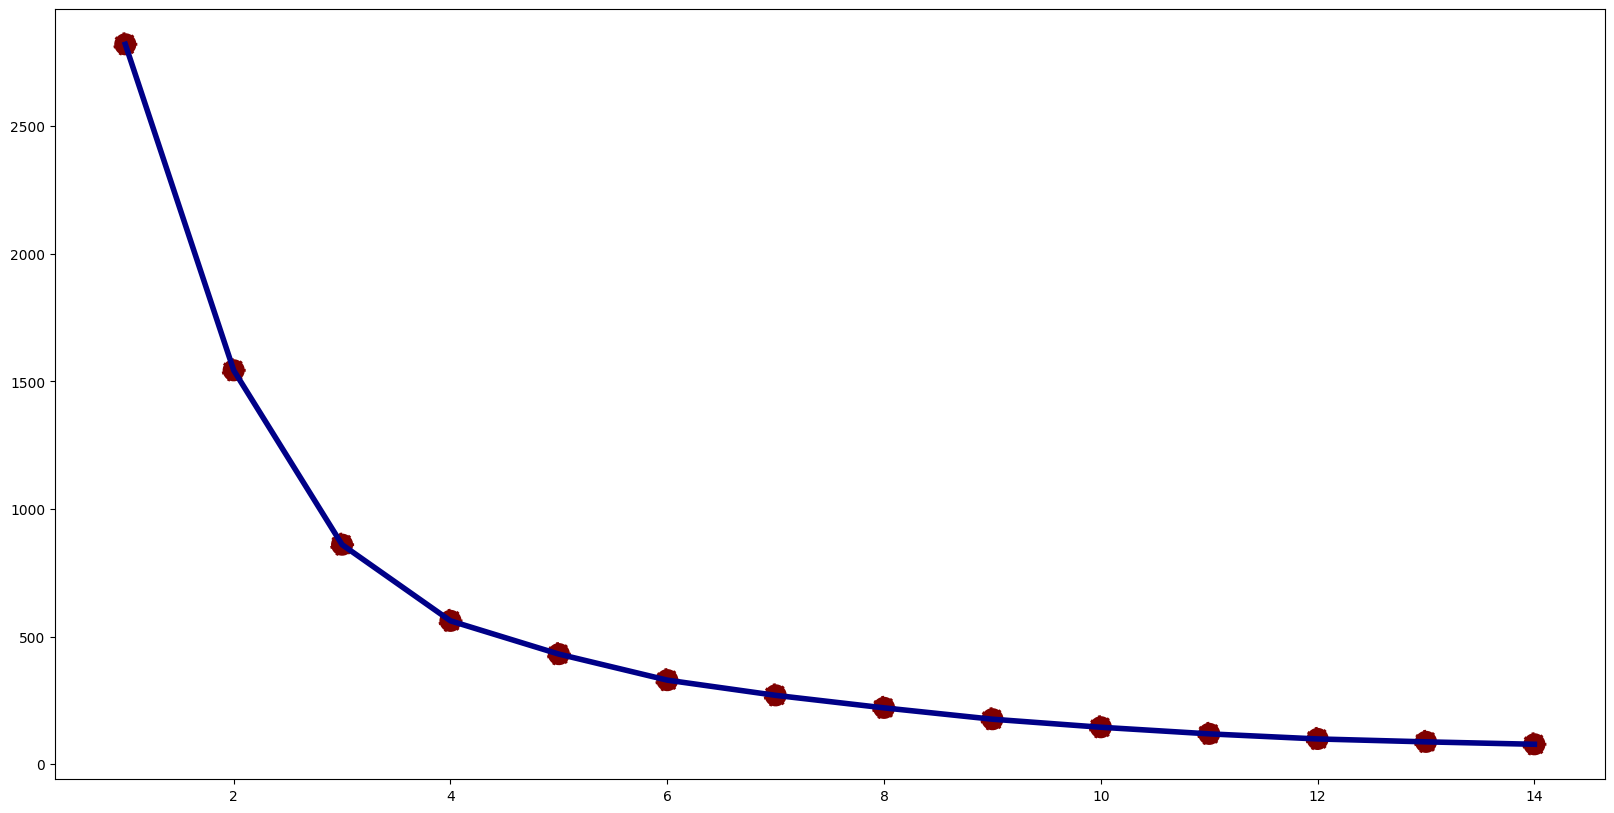

In [ ]:
# Finding the best number of clusters for K-Means clustering
inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model with the best number of clusters
model = KMeans(n_clusters = 4, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

In [ ]:
# Assign the cluster label to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot for visualizing the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "outlet",
    title = "Relationship between brand and outlet",
    color = "ClusterLabel",
    height=500
)
fig.show()

From the plot above, it can be seen that:

1) Cluster 0: customers who order brand 9 until 16 from the outlet number above 36 and in this cluster, most brands have only 1 outlet

2) Cluster 1: customers who order brand 4 until 10 from the outlet from number 5 until 41

3) Cluster 2: customers who order brand 1, 2, 3, and 6 from the outlet number above 44

4) Cluster 3: customers who order brand 1, 2, and 3 from the outlet from number 1 until 42


In [ ]:
# Sorted counts table based on cluster label
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
1,1,3,4381
0,1,2,3490
3,2,3,1981
2,2,2,1843
4,3,2,995
5,3,3,303
6,4,1,1448
7,5,1,3817
8,6,1,2289
9,6,2,356


From the sorted_counts table above, we can see that some brands have big difference between two clusters of outlets, such as **brand 3 and brand 6** **(Pizza E Birra and Kitchenette)**. And also, there are some brands that have small number of occurences, such as **brand 12 and brand 16 (DF Kitchen and Sushi Groove)**. Therefore, **our next main focuses will be more towards these four brands**.

##Between brand and weekday

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose only brand and weekday variables
df_combined2 = df_combined[['brand', 'weekday']]
df_combined2

,brand,weekday
11441,1,6
11442,1,6
11443,1,6
11444,1,6
11445,1,6
...,...,...
193,3,3
194,3,6
195,3,6
196,3,6


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'weekday'])
df_combined2_scaled.head()

,brand,weekday
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

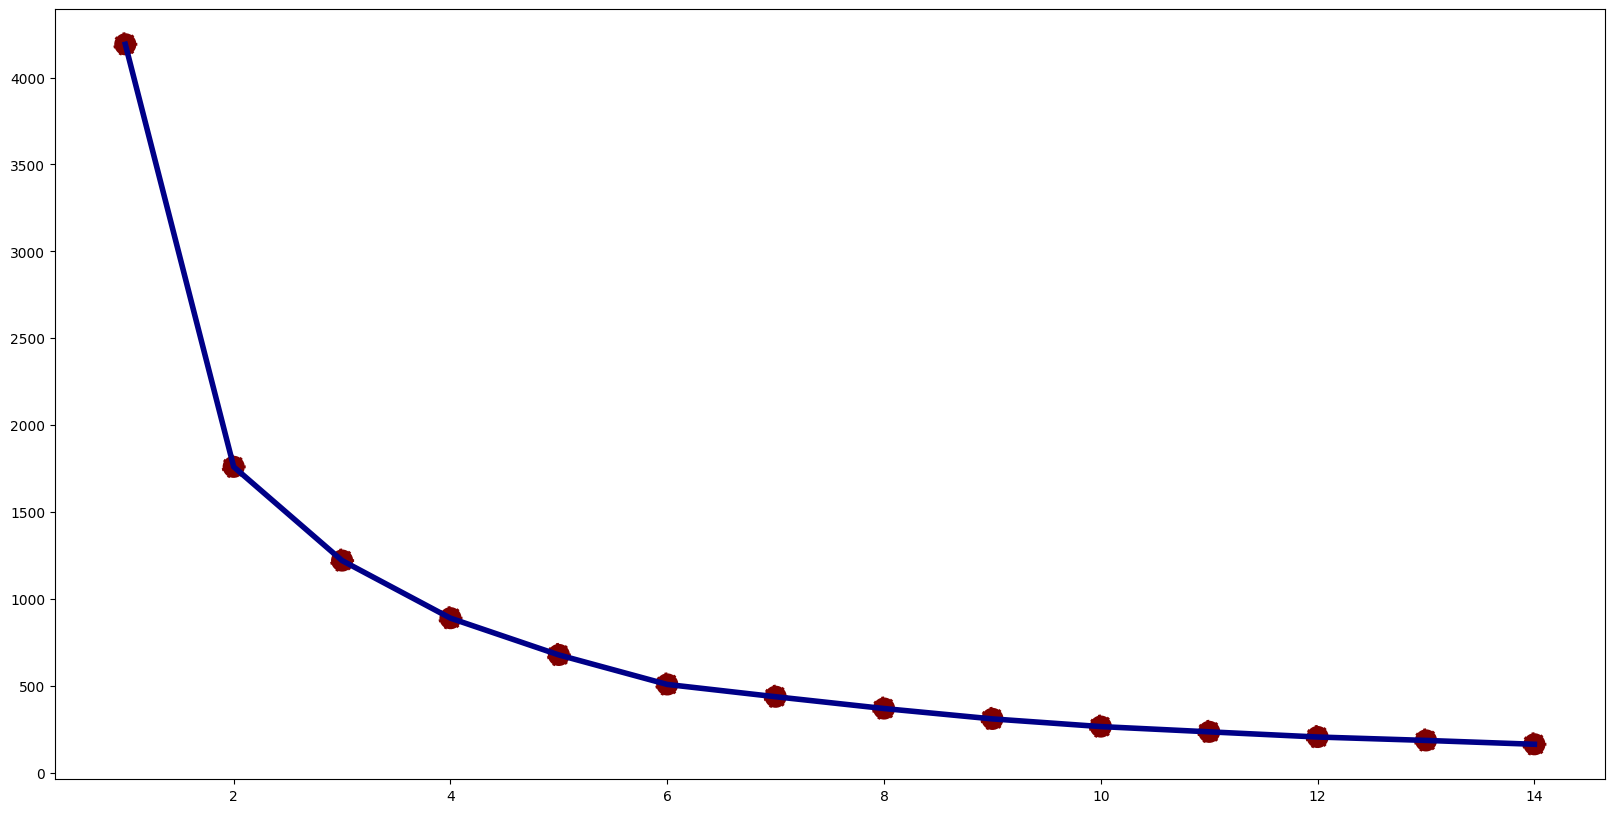

In [ ]:
# Finding the best number of clusters for K-Means clustering

inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model with the best number of clusters
model = KMeans(n_clusters = 6, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=0)

In [ ]:
# Assign the cluster labels to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot to visualize the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "weekday",
    title = "Relationship between brand and day of order",
    color = "ClusterLabel",
    height=500
)
fig.show()

From the plot above, it can seen that there are 6 clusters.

1. Cluster 0: customers who order brand 4 until 8 on weekends only
2. Cluster 1: customers who order brand 1 until 6 on Monday, Tuesday, and Wednesday only
3. Cluster 2: customers who order brand 1 until 3 on weekends only
4. Cluster 3: customers who order brand 6 until 16 on Monday, Tuesday, Wednesday, and Thursday only
5. Cluster 4: customers who order brand 8 until 16 on Friday, Saturday, and Sunday only
6. Cluster 5: customers who order brand 1 until 6 on Thursday and Friday only

In [ ]:
# Sorted counts table based on cluster labels
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
1,1,2,3581
0,1,1,2447
2,1,5,1843
4,2,2,2202
3,2,1,833
5,2,5,789
7,3,2,583
8,3,5,374
6,3,1,341
9,4,0,994


From the above sorted counts table, it can be seen that:
1. For brand 3, the most number of occurences falls into Cluster 2, which is on Saturday and Sunday.
2. For brand 6, the most number of occurences falls into Cluster 0, which is on Saturday and Sunday.
3. For brand 12, the most number of occurences falls into Cluster 4, which is on Friday, Saturday, and Sunday.
4. For brand 16, the most number of occurences falls into Cluster 4, which is on Saturday and Sunday.

##Between brand and hour

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose only brand and hour variables
df_combined2 = df_combined[['brand', 'hour']]
df_combined2

,brand,hour
11441,1,11
11442,1,11
11443,1,11
11444,1,11
11445,1,11
...,...,...
193,3,18
194,3,16
195,3,16
196,3,16


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'hour'])
df_combined2_scaled.head()

,brand,hour
0,0.0,0.478261
1,0.0,0.478261
2,0.0,0.478261
3,0.0,0.478261
4,0.0,0.478261


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

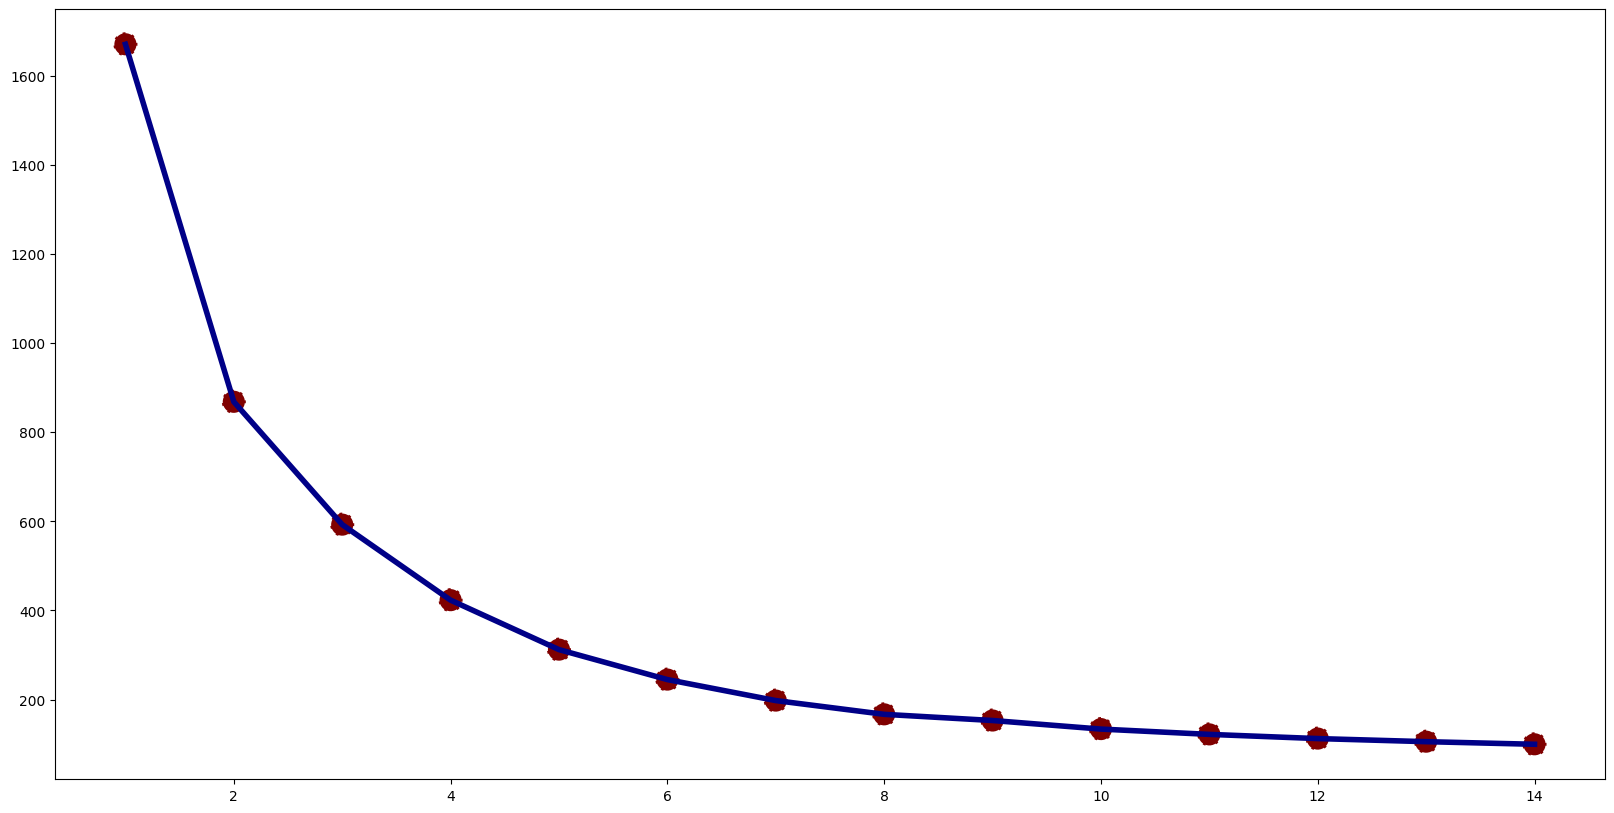

In [ ]:
# Finding the best number of clusters for K-Means clustering

inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model using the best number of clusters
model = KMeans(n_clusters = 6, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=0)

In [ ]:
# Assign the cluster labels to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot for visualizing the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "hour",
    title = "Relationship between brand and hour of the order",
    color = "ClusterLabel",
    height=500
)
fig.show()

From the plot above, it can be seen that:

1. Cluster 0: customers who order brand 1 until 3 from 16:00 until 23:00
2. Cluster 1: customers who order brand 4 until 7 from 07:00 until 15:00
3. Cluster 2: customers who order brand 9 until 16 from 12:00 until 23:00
4. Cluster 3: customers who order brand 4 until 8 from 16:00 until 23:00
5. Cluster 4: customers who order brand 1 until 3 from 00:00 until 15:00 (customers who order at 00:00 are most likely an outlier since most customers orders' start from 8:00-10:00)
6. Cluster 5: customers who order brand 8 until 15 from 00:00 until 17:00 the latest. (However, there are some customers in this cluster who order from 00:00 until 04:00. Then, there are no orders again until 07:00)

In [ ]:
# Sorted counts table based on cluster labels
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
1,1,4,4089
0,1,0,3782
2,2,0,2007
3,2,4,1817
4,3,0,664
5,3,4,634
7,4,3,801
6,4,1,647
9,5,3,1945
8,5,1,1872


From the sorted counts table above, it can be seen that:
1. For brand 3, the most number of occurences falls into Cluster 0, which starts from 16:00 until 23:00.
2. For brand 6, the most number of occurences falls into Cluster 1, which starts from 07:00 until 15:00.
3. For brand 12, there is no big difference between Cluster 2 and Cluster 5, however, it shows that most people order this brand from around 23:00 until 04:00.
4. For brand 16, there is only 1 Cluster and most people order this brand from around 12:00 until 21:00.

##Between brand and user tier level

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose brand and user tier level variables only
df_combined2 = df_combined[['brand', 'user_tier_level']]
df_combined2

,brand,user_tier_level
11441,1,1
11442,1,1
11443,1,1
11444,1,1
11445,1,1
...,...,...
193,3,4
194,3,4
195,3,4
196,3,4


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'user_tier_level'])
df_combined2_scaled.head()

,brand,user_tier_level
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

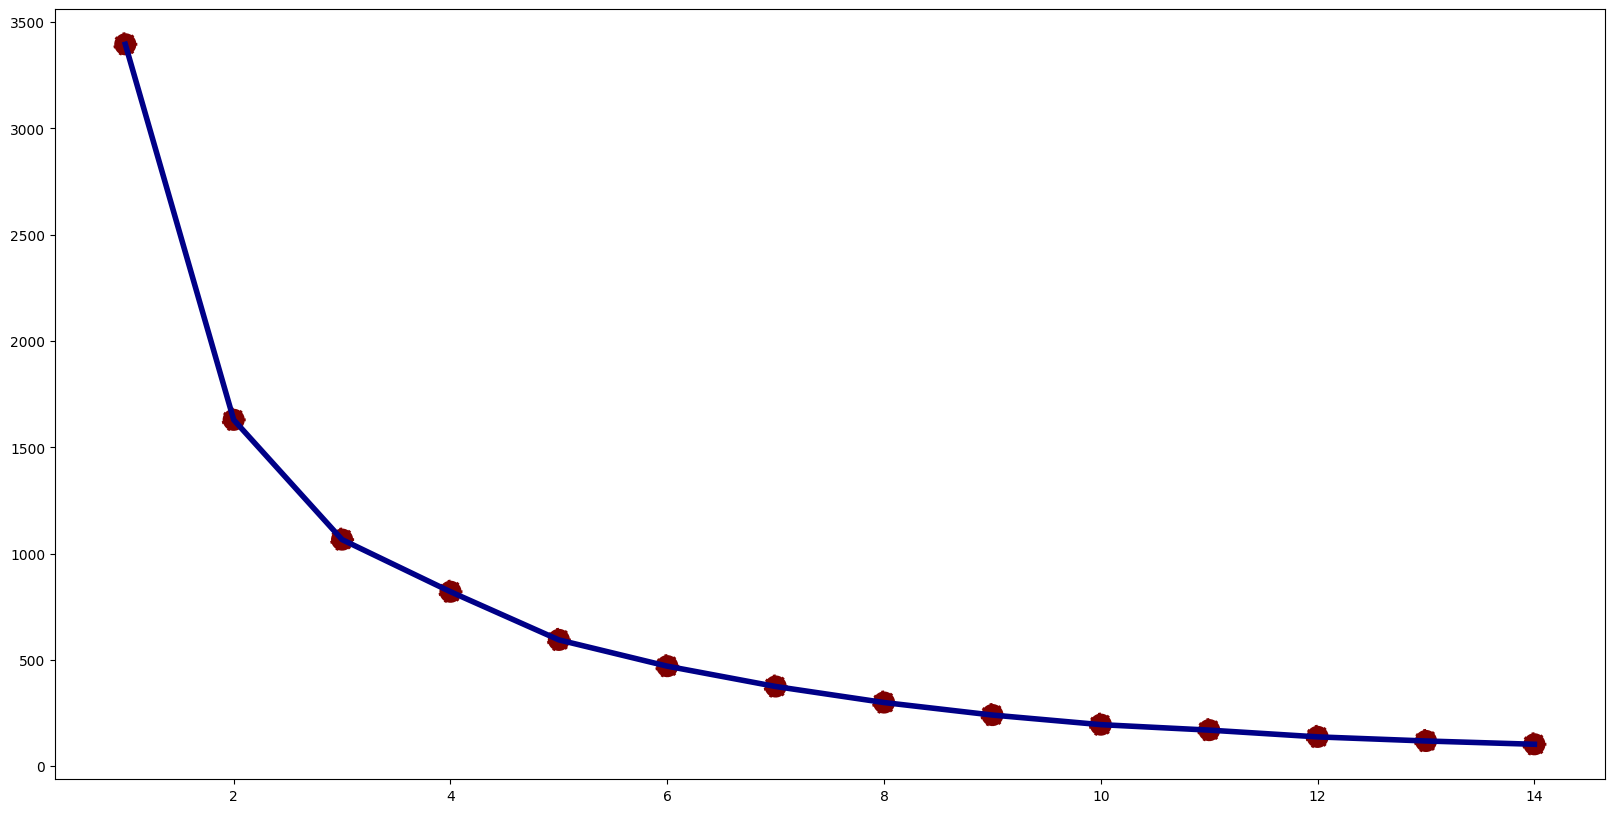

In [ ]:
# Finding the best number of clusters for K-Means clustering

inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model using the best number of clusters
model = KMeans(n_clusters = 5, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=0)

In [ ]:
# Assign the cluster labels to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot for visualizing the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "user_tier_level",
    title = "Relationship between brand and user tier level",
    color = "ClusterLabel",
    height=500
)
fig.show()

From the plot above, it can be seen that:
1. Cluster 0: customers who order brand 7 until 16 are Gold, Basic, Diamond, and Black
2. Cluster 1: customers who order brand 1 until 7 are Basic only
3. Cluster 2: customers who order brand 5 until 16 are Silver and Gold. However, for brand 13 until 16, only Silver users
4. Cluster 3: customers who order brand 1 until 6 are Diamond and Black
5. Cluster 4: customers who order brand 1 until 4 are Silver and Gold

In [ ]:
# Sorted counts table based on cluster labels
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
2,1,4,3141
1,1,3,2848
0,1,1,1882
3,2,1,1605
5,2,4,1585
4,2,3,634
8,3,4,712
6,3,1,320
7,3,3,266
11,4,4,680


From the sorted counts table above, it can be seen that:
1. For brand 3, people with user tier level 1 and 2, which is Silver and Gold (Cluster 4) are the most who order this brand.
2. For brand 6, people with user tier level 1 and 2, which is Silver and Gold (Cluster 2) are the most who order this brand.
3. For brand 12, people with user tier level 3, 4, and 5, which is Basic, Diamond, and Black (Cluster 0) are the most who order this brand.
4. For brand 16, people with user tier level 2, 3, 4, and 5, which is Silver, Basic, Diamond, and Black are the most who order this brand.

##Between brand and gender

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose brand and gender variables only
df_combined2 = df_combined[['brand', 'user_gender']]
df_combined2

,brand,user_gender
11441,1,1
11442,1,1
11443,1,1
11444,1,1
11445,1,1
...,...,...
193,3,2
194,3,2
195,3,2
196,3,2


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'gender'])
df_combined2_scaled.head()

,brand,gender
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

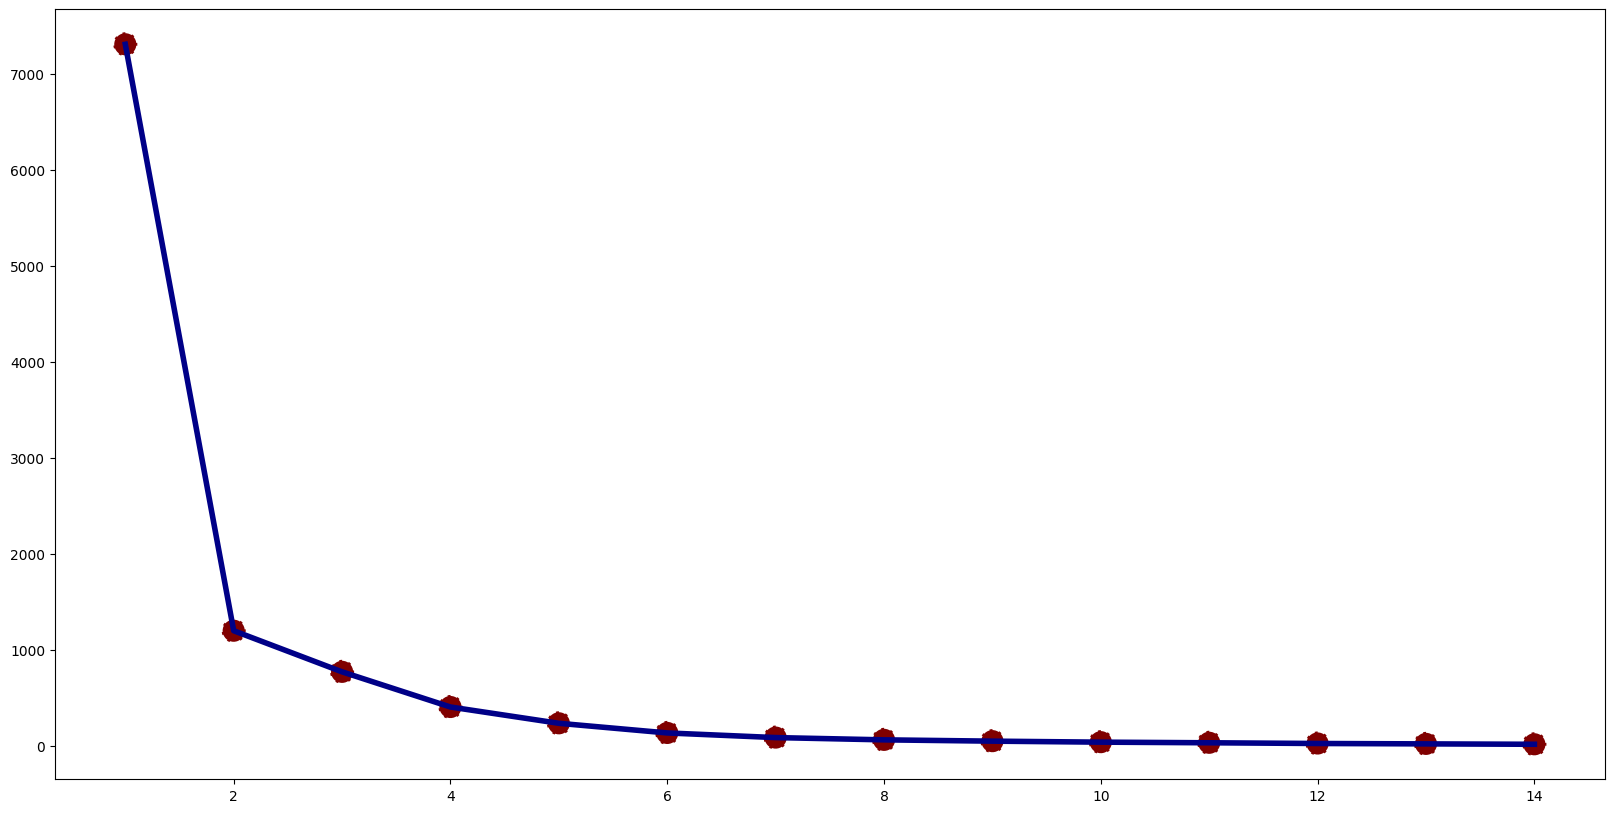

In [ ]:
# Finding the best number of clusters for K-Means clustering

from sklearn.cluster import KMeans

inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model using the best number of clusters
model = KMeans(n_clusters = 4, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

In [ ]:
# Assign the cluster labels to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot for visualizing the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "user_gender",
    title = "Relationship between brand and gender",
    color = "ClusterLabel",
    height=500
)
fig.show()

With the information that gender 1 = F and gender 2 = M

From the plot above, it can be seen that:

1. Cluster 0: customers who order brand 1 until 4 that are males
2. Cluster 1: customers who order brand 5 until 16 that are females
3. Cluster 2: customers who order brand 1 until 4 that are females
4. Cluster 3: customers who order brand 5 until 16 that are males

In [ ]:
# Sorted counts table based on cluster labels
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
0,1,0,4494
1,1,2,3377
3,2,2,2729
2,2,0,1095
4,3,0,688
5,3,2,610
6,4,0,766
7,4,2,682
8,5,1,2866
9,5,3,951


From the sorted counts table above, it can be seen that:
1. For brand 3, there are more male who ordered this brand (Cluster 0).
2. For brand 6, there are more female who ordered this brand (Cluster 1).
3. For brand 12, there are more female who ordered this brand (Cluster 1).
4. For brand 16, there are more female who ordered this brand (Cluster 1).

##Between brand and menu_category

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose brand and menu category variables only
df_combined2 = df_combined[['brand', 'menu_category']]
df_combined2

,brand,menu_category
11441,1,1
11442,1,1
11443,1,1
11444,1,1
11445,1,1
...,...,...
193,3,4
194,3,4
195,3,2
196,3,4


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'menu_category'])
df_combined2_scaled.head()

,brand,menu_category
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

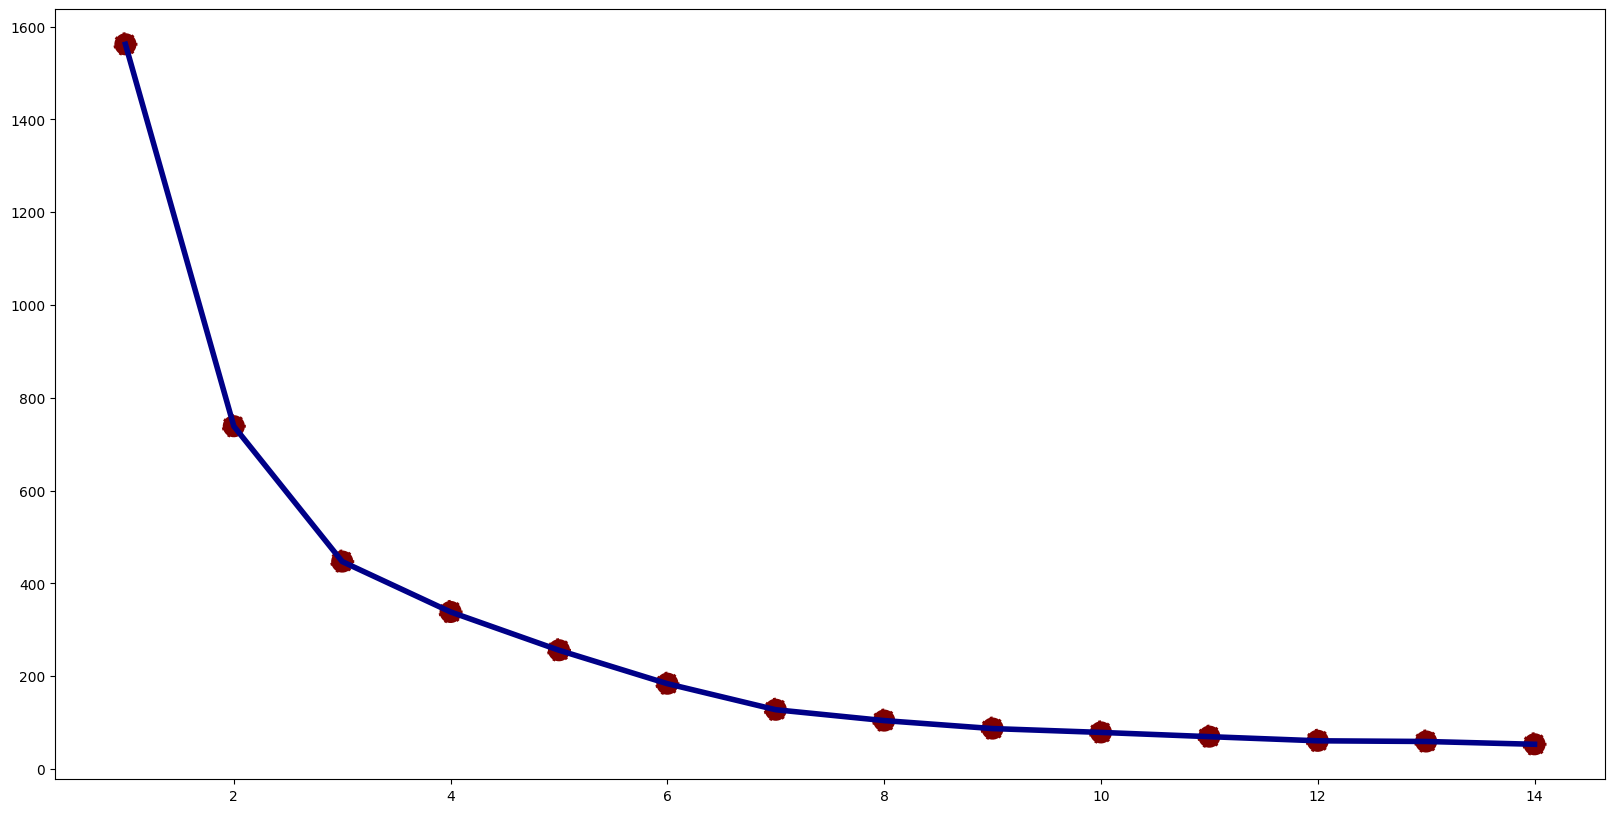

In [ ]:
# Finding the best number of clusters for K-Means clustering

from sklearn.cluster import KMeans

inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model using the best number of clusters
model = KMeans(n_clusters = 7, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=7, random_state=0)

In [ ]:
# Assign the cluster labels to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot for visualizing the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "menu_category",
    title = "Relationship between brand and menu_category",
    color = "ClusterLabel",
    height=500
)
fig.show()

From the plot above, it can be seen that:

1. Cluster 0: customers who order brand 12 until 16, order Beverage, Food, Liqueur, Beer, Wine, and/or Cigarette
2. Cluster 1: customers who order brand 1, 2, and 3, order Beverage only
3. Cluster 2: customers who order brand 4 until 7, order Beverage only
4. Cluster 3: customers who order brand 1, 2, and 3, order Food and/or Liqueur
5. Cluster 4: customers who order brand 8 until 12, order Beverage, Food, Liqueur, and/or Beer
6. Cluster 5: customers who order brand 1 until 14, order Beer, Wine, Cigarette, and/or Other
7. Cluster 6: customers who order brand 4 until 7, order Food and/or Liqueur.

In [ ]:
# Sorted counts table based on cluster labels
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
0,1,1,7143
1,1,3,703
2,1,5,25
4,2,3,2739
3,2,1,1082
5,2,5,3
7,3,3,684
6,3,1,377
8,3,5,237
11,4,6,847


From the sorted counts table above, it can be seen that:
1. For brand 3, people order menu category 2 and 3, which is Food and Liqueur (Cluster 3) the most.
2. For brand 6, people order menu category 2, which is Food (Cluster 6) the most.
3. For brand 12, people order menu category 2, 3, and 4, which is Food, Liqueur, and Beer (Cluster 0) the most.
4. For brand 16, people order menu category 1 and 2, which is Beverage and Food (Cluster 0).

##Between brand and menu_category_detail

In [ ]:
# Combine X and y variables to create a combined dataframe
df_combined = pd.concat([X, y], axis = 1)
df_combined.head()

,concept,brand,outlet,district,city,menu_type,menu_category,menu_category_detail,quantity,user_id,user_tier_level,user_gender,combination_count,month,weekday,hour,menu_name
11441,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,1
11442,1,1,1,1,1,2,1,2,1.0,1,1,1,2.0,1,6,11,2
11443,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,3
11444,1,1,1,1,1,1,1,1,1.0,1,1,1,1.0,1,6,11,4
11445,1,1,1,1,1,3,1,1,1.0,1,1,1,1.0,1,6,11,5


In [ ]:
# Choose only brand and menu category detail variables
df_combined2 = df_combined[['brand', 'menu_category_detail']]
df_combined2

,brand,menu_category_detail
11441,1,1
11442,1,2
11443,1,1
11444,1,1
11445,1,1
...,...,...
193,3,38
194,3,38
195,3,7
196,3,38


In [ ]:
# Scale the data
scaler.fit(df_combined2)
df_combined2_scaled = scaler.transform(df_combined2)
df_combined2_scaled = pd.DataFrame(df_combined2_scaled, columns = ['brand', 'menu_category_detail'])
df_combined2_scaled.head()

,brand,menu_category_detail
0,0.0,0.000000
1,0.0,0.010526
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

<Axes: >

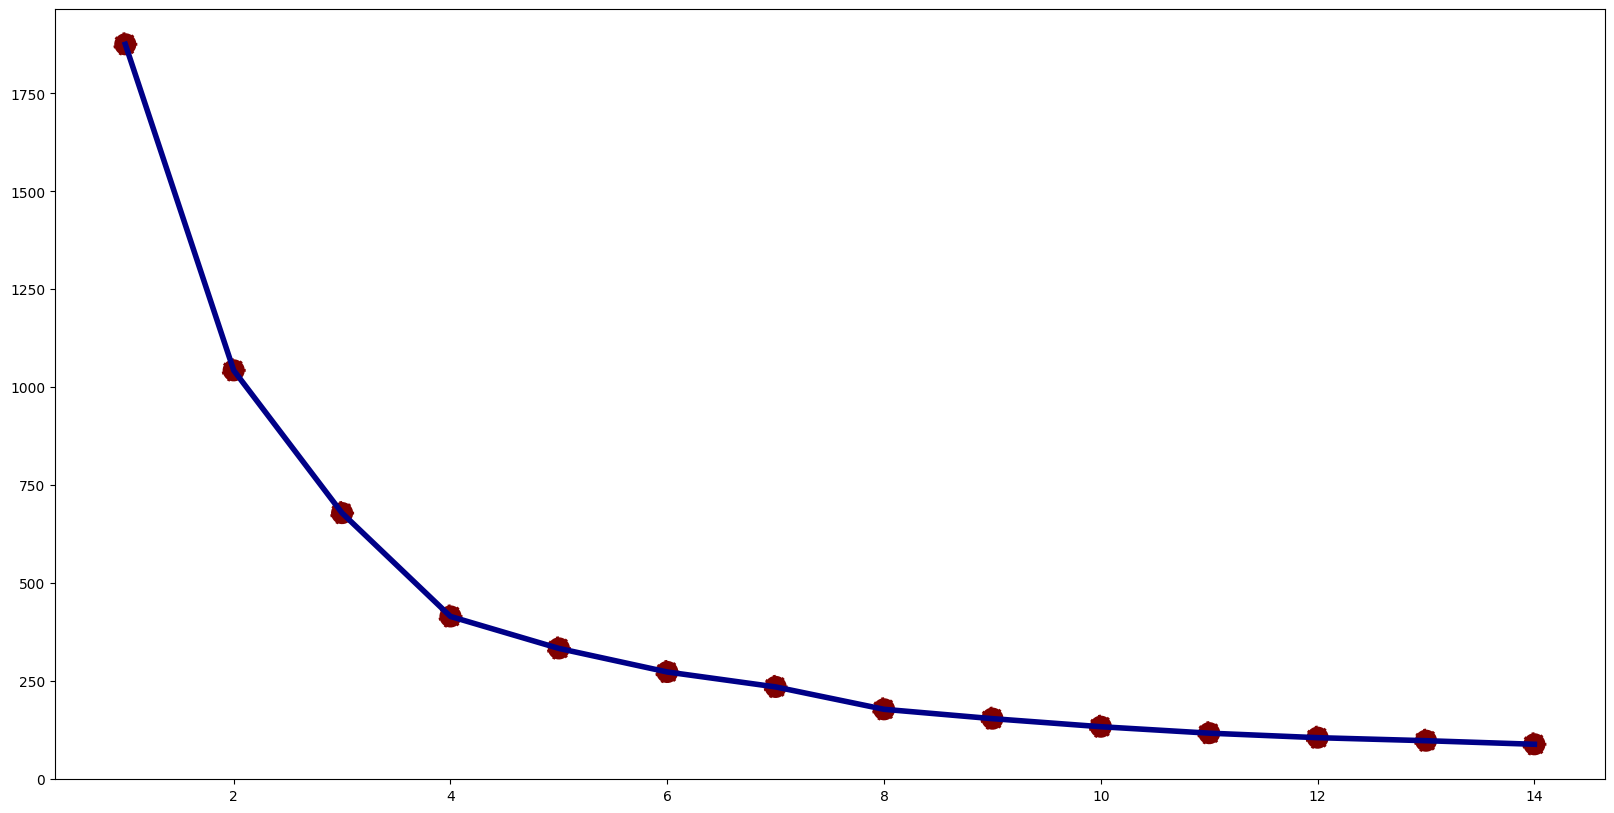

In [ ]:
# Finding the best number of clusters for K-Means clustering

inertia = []

for i in range(1, 15, 1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_combined2_scaled.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 15, 1), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 15, 1), y=inertia, s=300, color='#800000', linestyle='--')

In [ ]:
# Fit the model using the best number of clusters
model = KMeans(n_clusters = 4, random_state=0)
model.fit(df_combined2_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=0)

In [ ]:
# Assign the cluster labels to the data
df_combined2 = df_combined2.assign(ClusterLabel = model.labels_)

In [ ]:
# Scatter plot for visualizing the clusters
fig = px.scatter(
    data_frame=df_combined2,
    x = "brand",
    y= "menu_category_detail",
    title = "Relationship between brand and menu_category_detail",
    color = "ClusterLabel",
    height=500
)
fig.show()

From the plot above, it can be seen that:
1. Cluster 0: customers who order brand 4 until 8, order menu category from 4 until 31
2. Cluster 1: customers who order brand 1 until 8, order menu category from 27 until 95
3. Cluster 2: customers who order brand 7 until 16, mostly order menu category from 1 until 96
4. Cluster 3: customers who order brand 1 until 3, order menu category from 1 until 15


In [ ]:
# Sorted counts table based on cluster labels
sorted_counts = df_combined2.groupby(['brand', 'ClusterLabel']).size().reset_index(name='count').sort_values(by=['brand', 'count'], ascending=[True, False])
sorted_counts

,brand,ClusterLabel,count
1,1,3,6563
0,1,1,1308
3,2,3,2964
2,2,1,860
6,3,3,610
5,3,1,583
4,3,0,105
7,4,0,1150
8,4,1,298
9,5,0,3647


From the sorted counts table above, it can be seen that:
1. For brand 3, people order menus from menu category detail 3, 4, 6, 7, 9, and 11, which is Espresso Based, Beverage Modifier, Food Additional, Soup & Salad, Food Modifier, and Water & Softdrinks (Cluster 3) the most.
2. For brand 6, people order menus from menu category detail 4 until 14, 16, 27, 30, and 31, which is Beverage Modifier, Rice & Noodle, Food Additional, Soup & Salad, Tea, Food Modifier, Food Promo, Water & Softdrinks, Freshly Brewed by Djournal, All Day Breakfast, Beverage Promo, Pasta, Mains, Dessert and Lite Bites (Cluster 0) the most.
3. For brand 12, all the customers are in the same cluster. (Cluster 2)
4. For brand 16, all the customers are in the same cluster. (Cluster 2)

##The recommendations for some brands chosen

From all the analyses above between variable brand and some other different variables, there are some recommendations for brand 3, 6, 12, and 16.

A. For brand 3 outlet number 4 and 20 (Pizza E Birra, outlet: Gandaria City and Pizza E Birra x Kitchenette, Central Park):

1) Offer special loyalty programs, especially for users with tier level of Silver and Gold

2) Showcase the most ordered menu category detail of food and liqueur on top of list of menus of the brand

3) Offer a variety of portions for the most ordered menu category detail to accomodate different appetites

4) Offer a happy-hour promo on the evening weekends

5) Offer a discount coupons for delivery fee if the order price exceeds Rp 50.000 and Rp 100.000 (since the most ordered menus are mostly drinks and not main-course menus)

<br>

B. For brand 6 outlet number 62, 69, 77, 78, 100 (Kitchenette, outlet: Kemang Village, Mall Kelapa Gading, Kota Kasablanka, Galaxy Mall, and Kuta Beachwalk):

1) Offer special loyalty programs, especially for users with tier level of Silver and Gold

2) Showcase the most ordered menu category detail of Food on top of list of menus of the brand

3) Offer a variety of portions for the most ordered menu category detail to accomodate different appetites

4) Since there are more female who ordered, make special collaborations, such as with well-known female beauty brands at each mall for every order for the most ordered menu category detail

5) Offer a happy-hour promo on the morning weekends

<br>

C. For brand 12 (DF Kitchen, outlet Gatot Subroto):

1) Offer special loyalty programs, especially for users with tier level of Basic, Black, and Diamond

2) Create more new and diverse set of menus in the menu category of Food, Liqueur, and Beer

3) Since it is a nightclub, create a collaboration with special events from the famous international artists. For example, offer a package of set of menus and free pass for a specific special events or offer a package of set of menus and free merchandise from the artist

4) Offer a happy-hour promo at the dawn of each Friday, Saturday, and Sunday

<br>

D. For brand 16 (Sushi Groove, outlet Kota Kasablanka and Paris Van Java):

1) Offer special loyalty programs, especially for users with tier level of Silver, Basic, Diamond, and Black

2) Offer a variety of portions for the most ordered menu category detail to accomodate different appetities

3) Create more new and diverse set of menus in the menu category of Food and Beverage

4) Since there are more female who ordered, make special collaborations, such as with well-known female beauty brands at each mall for every order for the most ordered menu category detail

5) Offer a happy-hour promo, especially that is starting from 12:00 until 21:00 on Friday, Saturday, and Sunday